# HW 3 - Нейронные сети

In [76]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [10]:
!pip install torch torchvision

In [77]:
from tqdm import tqdm
# import warnings
# warnings.simplefilter('ignore')
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset, Subset
from torchvision import transforms
import torch
print(torch.__version__)

1.7.0+cu101


# Загрузка данных (5%)

In [4]:
lfw_people = datasets.fetch_lfw_people(
    min_faces_per_person=50, 
    resize=0.4,
)

Выведите:
- кол-во объектов
- Кол-во признаков
- кол-во классов
- посмотрите, сколько изображений соответствет каждому классу

In [6]:
# Ваш код здесь
D_out = 0
D_in = 0

print("кол-во объектов", 0)
print("Кол-во признаков", D_in)

print("кол-во классов", D_out)
print("сколько изображений соответствет каждому классу", 0)

кол-во объектов 0
Кол-во признаков 0
кол-во классов 0
сколько изображений соответствет каждому классу 0


- Отрисуйте изображения для случайных семплов с подписями имен класса 

Код можно взять из [семинара](https://github.com/ml-dafe/ml_mipt_dafe_major/blob/master/week_07/Seminar_07_NN.ipynb)

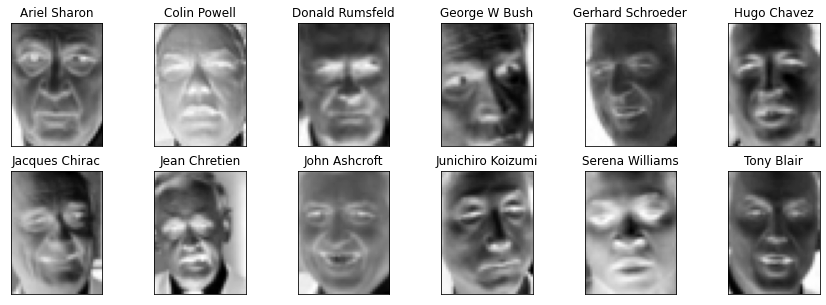

In [7]:
# Ваш код здесь

In [ ]:
# Конечно мы сначала должны достать данные и перевести их в тензоры: 
x = # Ваш код здесь
y = # Ваш код здесь

# используйте lfw_people.target и lfw_people.images

type(x)

## Разверните данные в строку, чтобы подать на вход нейросети

In [110]:
# Ваш код здесь

In [81]:
x_flat = 

print(f'Была размерность: {x.shape}, стала: {x_flat.shape}')

Была размерность: torch.Size([1560, 50, 37]), стала: torch.Size([1560, 1850])


In [82]:
# Разделим данные на трейн/валидацию/тест: 
# train_test_split()
# random_state = 42

x_train, x_test, y_train, y_test = # Ваш код здесь
x_val, x_test, y_val, y_test = # Ваш код здесь

In [83]:
print(x_train.shape, x_val.shape, x_test.shape)

torch.Size([936, 1850]) torch.Size([312, 1850]) torch.Size([312, 1850])


# Fully connected neural network (20%)
Создадим нашу первую модель, будем использовать полносвязную нейронную сеть 
- Первый слой: 64 нейрона, функция активации Sigmoid
- Скрытый слой: 32 нейрона, функция активации Sigmoid
- Чтобы наша сеть не переобучалась, после каждого полно-связного используйте слой [Dropout](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html) с параметром p = 0.4
- Выходной слой: на ваше усмотрение :) 
- Функция потерь - ну конечно же ...
- Не забудьте задать инициализацию весов

Будем обучать с помощью Adam на 100 эпохах,  размер сэмпла для минибатча: 10

Тренируемся на train, валидируем на val, тестируемся на test

In [85]:
# Ваш код здесь

model = Model()

In [ ]:
model

In [87]:
optimizer = # Ваш код здесь

In [88]:
loss_fn = # Ваш код здесь

In [111]:
# Ваш код здесь

Постройте график значения функции потерь на train и val

In [112]:
# Ваш код здесь

Сколько эпох нужно?

Постройте confusion_matrix (используйте sklearn) на тестовой выборке (test)

In [ ]:
confusionmatrix = # Ваш код здесь

plt.figure(figsize=(12, 6))
sns.heatmap(confusionmatrix, cmap='Greens', annot=True,
            xticklabels=lfw_people.target_names,
            yticklabels=lfw_people.target_names)
plt.show()

Посчитайте долю правильных ответов(test)

In [ ]:
# Ваш код здесь

Оцените, кого с кем вы чаще всего путаете? Почему одних людей наша сеть путает с другими чаще?

In [ ]:
# Ваш код здесь

Вспомним, что в нашей задачи классы, не сбалансированы, какая получится доля правильных ответов, если мы всегда будем предсказывать константнам значением: George W Bush

In [ ]:
# Ваш код здесь

## А теперь соберите модель посложнее, вам может захотеться (до +10%):
- BatchNorm
- Другую функцию активации
- Нормировать или центрировать данные
- Больше слоев
- Жирнее слои
- Обучаться на GPU (см [семинар 8](https://github.com/ml-dafe/ml_mipt_dafe_major/blob/master/week_08_CNN/Seminar_8_CNN.ipynb))
 - в jupyter notebook Runtime -> Change Runtime type
 - Модель на GPU
 - Данные на GPU


In [ ]:
# Ваш код здесь

# Это же картинки! Попробуем Convolution neural network (30%)
- Используйте два сверточных слоя
 - 16 фильтров (ядер)
 - размер ядра 5 
 - функция активации ReLu
 - padding - 'same' (ну типо чтобы размер картинки не менялся)
- Затем слой MaxPooling'a с размерром 2х2
- Затем полносвязные слои: 32 нейрона и 16 нейронов
- Выходной слой как раньше 
- учить 100 эпох по 64 картинки в батч

In [ ]:
# Ваш код здесь

Постройте confusion_matrix (используйте sklearn) на тестовой выборке (test) и посчитайте долю правильных ответов(test)

In [ ]:
confusionmatrix = # Ваш код здесь

plt.figure(figsize=(12, 6))
sns.heatmap(confusionmatrix, cmap='Greens', annot=True,
            xticklabels=lfw_people.target_names,
            yticklabels=lfw_people.target_names)
plt.show()

Кажется, что стало лучше, но постройте график зависимости доли правильных ответов от эпохи на обучении и валидации. Какие выводы можно сделать?  

### Ваши ответы здесь





# Aугментация дынных (25%)
Вспомним, что для борьбы с переобучением, нам может помочь Aугментация, для этого мы будем использовать стандартные возможности . Загляните в [доку](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html) или в эту [статью](https://www.analyticsvidhya.com/blog/2019/12/image-augmentation-deep-learning-pytorch/) + частично Семинар 8 + Семинар 10

Вы можете использовать любые аугментации

In [99]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision import datasets
import PIL

## Создайте объект transforms

In [100]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     
    # Ваш код здесь


     transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])])

Отобразите результат применения Аугментации

In [105]:
# Ваш код здесь

## Создайте свой Dataset и DataLoader (доработать приведенную реализацию)

In [108]:
class TrainDataSet(Dataset):
  def __init__(self, x, y, transform):
    self.x = x
    self.y = y
    self.transform = transform

  def __len__(self):
    return self.x.shape[0]

  def __getitem__(self, idx):
    return self.transform(self.x[idx]), self.y[idx]

x_train_ds = TrainDataSet(x_train, y_train, transform)


x_train_dl = torch.utils.data.DataLoader(x_train_ds, 
                                         batch_size=64, 
                                         shuffle=True, 
                                         num_workers=2)


## Обучите нейросеть с применением аугментаций

In [109]:
# Ваш код здесь

Посмотрите долю правильных ответов на тестовой выборке и постройте график зависимости от эпох для обучения и валидации
Ответьте на вопросы и объясните свой ответ: 
- Удалось ли Вам победить переобучение? 
- Будет ли полезна аугментация RandomHorizontalFlip? а RandomVerticalFlip?

## Ваши ответы здесь

# А теперь попробуем предобученные нейросети (конечно же сверточные) (20%)
Подробнее в [документации](https://pytorch.org/docs/stable/torchvision/models.html) 
- Попробуйте оживить Inception
- Если не получится, то хотябы ResNet



In [ ]:
# Ваш код здесь

## Дополнительное задание (дополнительные +15%) 
Обучите такую нейронную сеть, чтобы на тестовой выборке достичь доли правильных ответов больше 92%

In [ ]:
# Ваш код здесь